# Protein plasma binding Explorartory Data Analysis

## 1. Problem 🧐

Identify compound's property.

Data:
* CSV (IC50 values, MACCS keys, Klekota-Roth and PubChem substructure fingerprints)
* SDF (series of molfiles)

MACCS keys:
* List of 166 (keys) binary values (0 or 1) which characterize a molecule.
Details: https://github.com/rdkit/rdkit-orig/blob/master/rdkit/Chem/MACCSkeys.py

Klekota-Roth fingerprints:
* Set of 4860 chemical substructures (binary values).
Details: 

PubChem fingerprints:
* 881 binary bits (indicate the presence or absence of a certain group of chemical features in a compound).
Details: https://web.cse.ohio-state.edu/~zhang.10631/bak/drugreposition/list_fingerprints.pdf



### 1.1 Libraries 📖

In [1]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import MolToSmiles

pd.set_option('display.max_columns', None)

colors_palette = ['#ffa600','#ff6361','#bc5090','#58508d', '#65345a']

### 1.2 Functions

In [2]:
def annotate(ax, fontsize=12):
    for p in ax.patches:
        ax.annotate(format(p.get_height(), ','), 
               (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', 
               xytext = (0, 6), textcoords = 'offset points', fontsize=fontsize)

## 2. Fingerprints

### 2.1 Data Analyse and Preprocessing 📊

In [3]:
df_protein = pd.read_csv("../data/raw/protein_plasma_binding_MACCSFP.csv")
print("Examples: {0}, columns: {1}".format(df_protein.shape[0],df_protein.shape[1]))
df_protein.head()

Examples: 2882, columns: 167


protein_plasma_binding  MACCSFP1  MACCSFP2  MACCSFP3  MACCSFP4  MACCSFP5  \
0                    99.0         0         0         0         0         0   
1                    89.9         0         0         0         0         0   
2                    97.0         0         0         0         0         0   
3                   100.0         0         0         0         0         0   
4                    82.0         0         0         0         0         0   

   MACCSFP6  MACCSFP7  MACCSFP8  MACCSFP9  MACCSFP10  MACCSFP11  MACCSFP12  \
0         0         0         0         0          0          0          0   
1         0         0         0         0          0          0          0   
2         0         0         0         0          0          0          0   
3         0         0         0         0          0          0          0   
4         0         0         0         0          0          0          0   

   MACCSFP13  MACCSFP14  MACCSFP15  MACCSFP16  MACCSFP17  MACCSFP18  \
0          0          0          0          0          1          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   MACCSFP19  MACCSFP20  MACCSFP21  MACCSFP22  MACCSFP23  MACCSFP24  \
0          0          0          0          1          0          0   
1          0          0          0          1          0          0   
2          0          0          0          1          0          0   
3          0          0          0          1          0          0   
4          0          0          0          1          0          0   

   MACCSFP25  MACCSFP26  MACCSFP27  MACCSFP28  MACCSFP29  MACCSFP30  \
0          0          0          0          1          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   MACCSFP31  MACCSFP32  MACCSFP33  MACCSFP34  MACCSFP35  MACCSFP36  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   MACCSFP37  MACCSFP38  MACCSFP39  MACCSFP40  MACCSFP41  MACCSFP42  \
0          0          1          0          0          0          1   
1          0          1          0          0          1          1   
2          0          0          0          0          1          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   MACCSFP43  MACCSFP44  MACCSFP45  MACCSFP46  MACCSFP47  MACCSFP48  \
0          1          0          0          0          0          0   
1          1          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          1          0          0   
4          0          0          0          0          0          0   

   MACCSFP49  MACCSFP50  MACCSFP51  MACCSFP52  MACCSFP53  MACCSFP54  \
0          0          0          0          0          1          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          1          0          0          0          0   

   MACCSFP55  MACCSFP56  MACCSFP57  MACCSFP58  MACCSFP59  MACCSFP60  \

In [4]:
df_protein_pubch = pd.read_csv("../data/raw/protein_plasma_binding_PubchemFP.csv")
print("Examples: {0}, columns: {1}".format(df_protein_pubch.shape[0],df_protein_pubch.shape[1]))
df_protein_pubch.head()

Examples: 2882, columns: 882


protein_plasma_binding  PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  \
0                    99.0           1           1           1           1   
1                    89.9           1           1           1           0   
2                    97.0           1           1           1           0   
3                   100.0           1           1           1           1   
4                    82.0           1           1           1           1   

   PubchemFP4  PubchemFP5  PubchemFP6  PubchemFP7  PubchemFP8  PubchemFP9  \
0           0           0           0           0           0           1   
1           0           0           0           0           0           1   
2           0           0           0           0           0           1   
3           0           0           0           0           0           1   
4           0           0           0           0           0           1   

   PubchemFP10  PubchemFP11  PubchemFP12  PubchemFP13  PubchemFP14  \
0            1            1            1            0            1   
1            1            1            0            0            1   
2            1            1            1            0            1   
3            1            1            1            1            1   
4            1            1            1            0            1   

   PubchemFP15  PubchemFP16  PubchemFP17  PubchemFP18  PubchemFP19  \
0            1            0            0            1            1   
1            1            0            0            1            0   
2            1            0            0            1            0   
3            0            0            0            1            1   
4            1            0            0            1            1   

   PubchemFP20  PubchemFP21  PubchemFP22  PubchemFP23  PubchemFP24  \
0            1            0            0            1            1   
1            0            0            0            1            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   PubchemFP25  PubchemFP26  PubchemFP27  PubchemFP28  PubchemFP29  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   PubchemFP30  PubchemFP31  PubchemFP32  PubchemFP33  PubchemFP34  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   PubchemFP35  PubchemFP36  PubchemFP37  PubchemFP38  PubchemFP39  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   PubchemFP40  PubchemFP41  PubchemFP42  PubchemFP43  PubchemFP44  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            1            0   
4            0            0            0            0            0   

   PubchemFP45  PubchemFP46  PubchemFP47  PubchemFP48  PubchemFP49  \
0            0            0            0            0       

In [5]:
df_protein_klek = pd.read_csv("../data/raw/protein_plasma_binding_KlekFP.csv")
print("Examples: {0}, columns: {1}".format(df_protein_klek.shape[0],df_protein_klek.shape[1]))
df_protein_klek.head()

Examples: 2882, columns: 4861


protein_plasma_binding  KRFP1  KRFP2  KRFP3  KRFP4  KRFP5  KRFP6  KRFP7  \
0                    99.0      1      1      0      0      0      0      0   
1                    89.9      1      0      0      0      0      0      0   
2                    97.0      1      0      0      0      0      0      0   
3                   100.0      1      0      0      0      0      0      0   
4                    82.0      1      0      0      0      0      0      0   

   KRFP8  KRFP9  KRFP10  KRFP11  KRFP12  KRFP13  KRFP14  KRFP15  KRFP16  \
0      0      0       0       0       0       0       0       0       0   
1      0      0       0       0       0       0       1       0       1   
2      0      0       0       0       0       0       1       0       0   
3      0      0       0       0       0       0       0       0       0   
4      0      0       0       0       0       0       0       0       0   

   KRFP17  KRFP18  KRFP19  KRFP20  KRFP21  KRFP22  KRFP23  KRFP24  KRFP25  \
0       0       0       0       1       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       1       0       0       0       0       0       0       0   
4       0       0       0       1       0       0       0       0       0   

   KRFP26  KRFP27  KRFP28  KRFP29  KRFP30  KRFP31  KRFP32  KRFP33  KRFP34  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       1       0   
4       0       0       0       0       0       0       0       0       0   

   KRFP35  KRFP36  KRFP37  KRFP38  KRFP39  KRFP40  KRFP41  KRFP42  KRFP43  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   KRFP44  KRFP45  KRFP46  KRFP47  KRFP48  KRFP49  KRFP50  KRFP51  KRFP52  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   KRFP53  KRFP54  KRFP55  KRFP56  KRFP57  KRFP58  KRFP59  KRFP60  KRFP61  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   KRFP62  KRFP63  KRFP64  KRFP65  KRFP66  KRFP67  KRFP68  KRFP69  KRFP70  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   KRFP71  KRFP72  KRFP73  KRFP74  KRFP75  KRFP76  KRFP77  KRFP78  KRFP79  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0 

### 2.1.1 Missing/Invalid values 🔎

In [6]:
# count missing values
print("Missing values: {0}".format(df_protein.isnull().sum().sum()))
print("Missing values: {0}".format(df_protein_pubch.isnull().sum().sum()))
print("Missing values: {0}".format(df_protein_klek.isnull().sum().sum()))

Missing values: 219
Missing values: 219
Missing values: 219


In [7]:
to_drop_protein = [index for index, row in df_protein.iterrows() if row.isnull().any()]
print(len(to_drop_protein))
df_protein.drop(to_drop_protein, axis=0, inplace=True)
print("Examples: {0}, columns: {1}".format(df_protein.shape[0],df_protein.shape[1]))
df_protein.head()

219
Examples: 2663, columns: 167


protein_plasma_binding  MACCSFP1  MACCSFP2  MACCSFP3  MACCSFP4  MACCSFP5  \
0                    99.0         0         0         0         0         0   
1                    89.9         0         0         0         0         0   
2                    97.0         0         0         0         0         0   
3                   100.0         0         0         0         0         0   
4                    82.0         0         0         0         0         0   

   MACCSFP6  MACCSFP7  MACCSFP8  MACCSFP9  MACCSFP10  MACCSFP11  MACCSFP12  \
0         0         0         0         0          0          0          0   
1         0         0         0         0          0          0          0   
2         0         0         0         0          0          0          0   
3         0         0         0         0          0          0          0   
4         0         0         0         0          0          0          0   

   MACCSFP13  MACCSFP14  MACCSFP15  MACCSFP16  MACCSFP17  MACCSFP18  \
0          0          0          0          0          1          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   MACCSFP19  MACCSFP20  MACCSFP21  MACCSFP22  MACCSFP23  MACCSFP24  \
0          0          0          0          1          0          0   
1          0          0          0          1          0          0   
2          0          0          0          1          0          0   
3          0          0          0          1          0          0   
4          0          0          0          1          0          0   

   MACCSFP25  MACCSFP26  MACCSFP27  MACCSFP28  MACCSFP29  MACCSFP30  \
0          0          0          0          1          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   MACCSFP31  MACCSFP32  MACCSFP33  MACCSFP34  MACCSFP35  MACCSFP36  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   MACCSFP37  MACCSFP38  MACCSFP39  MACCSFP40  MACCSFP41  MACCSFP42  \
0          0          1          0          0          0          1   
1          0          1          0          0          1          1   
2          0          0          0          0          1          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   MACCSFP43  MACCSFP44  MACCSFP45  MACCSFP46  MACCSFP47  MACCSFP48  \
0          1          0          0          0          0          0   
1          1          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          1          0          0   
4          0          0          0          0          0          0   

   MACCSFP49  MACCSFP50  MACCSFP51  MACCSFP52  MACCSFP53  MACCSFP54  \
0          0          0          0          0          1          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          1          0          0          0          0   

   MACCSFP55  MACCSFP56  MACCSFP57  MACCSFP58  MACCSFP59  MACCSFP60  \

In [8]:
# Convert non-numeric entries to NaN (everything that cannot be converted to a numeric value)
df_protein2 = (df_protein.drop(df_protein.columns, axis=1)
         .join(df_protein[df_protein.columns].apply(pd.to_numeric, errors='coerce')))

In [9]:
print("Invalid values: {0}".format(df_protein2.isnull().sum().sum()))

Invalid values: 0


### 2.1.2 Class balance/Outliers

In [10]:
df_protein2['protein_plasma_binding'].describe()

count    2663.000000
mean       86.185137
std        22.506276
min         0.030000
25%        85.000000
50%        96.000000
75%        99.000000
max       100.000000
Name: protein_plasma_binding, dtype: float64

In [11]:
inactive = df_protein2[df_protein2['protein_plasma_binding']<=85].count()[0]
active = df_protein2[df_protein2['protein_plasma_binding']>85].count()[0]
all_protein = df_protein2['protein_plasma_binding'].count()
print('For 85%: {0} Active compounds and {1} inactive compounds'.format(active, inactive))
print('For 85%: {:.2%} Active compounds and {:.2%} inactive compounds'.format(active/all_protein, inactive/all_protein))

For 85%: 1995 Active compounds and 668 inactive compounds
For 85%: 74.92% Active compounds and 25.08% inactive compounds


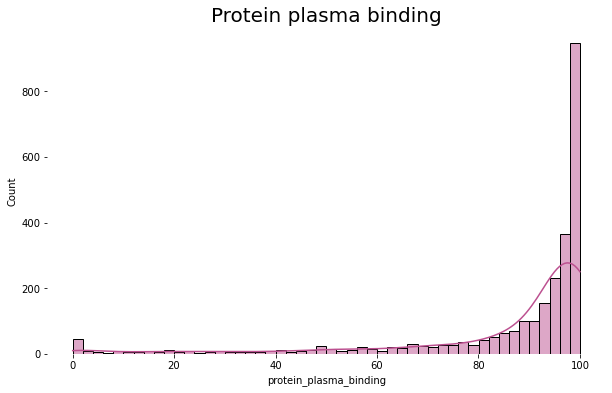

In [20]:
plt.figure(figsize=(10,6))
plt.title('Protein plasma binding', fontsize=20)
protein_plot = sns.histplot(data=df_protein2, x='protein_plasma_binding', kde=True, color=colors_palette[2])

sns.despine(left=True, bottom=True)

In [21]:
df_scaled = StandardScaler().fit_transform(df_protein2['protein_plasma_binding'][:,np.newaxis]);
low_range = df_scaled[df_scaled[:,0].argsort()][:10]
high_range= df_scaled[df_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-3.8287684 ]
 [-3.8287684 ]
 [-3.8287684 ]
 [-3.828324  ]
 [-3.828324  ]
 [-3.82743519]
 [-3.82654638]
 [-3.82610198]
 [-3.82565757]
 [-3.82565757]]

outer range (high) of the distribution:
[[0.61393798]
 [0.61393798]
 [0.61393798]
 [0.61393798]
 [0.61393798]
 [0.61393798]
 [0.61393798]
 [0.61393798]
 [0.61393798]
 [0.61393798]]


/home/ewelina/miniconda3/envs/admet/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


### 2.1.3 Classes statistics 📈

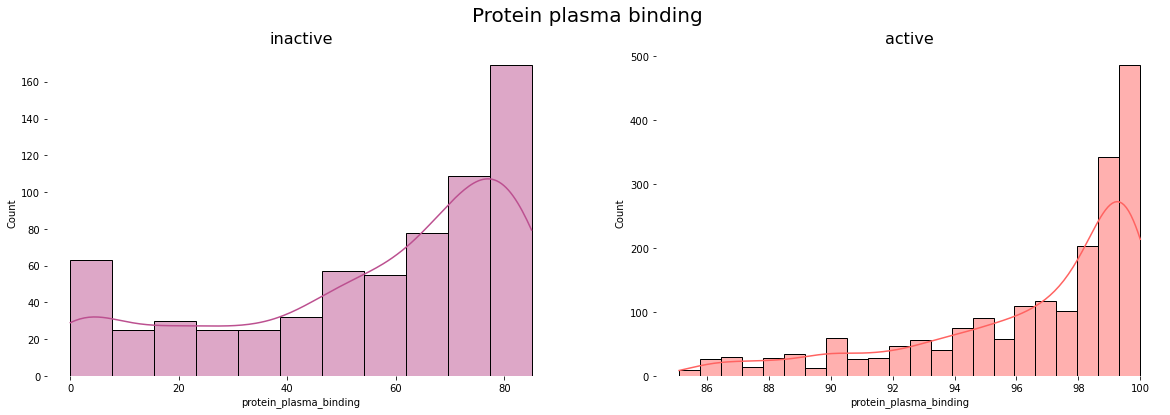

In [22]:
protein_1 = df_protein2[df_protein2['protein_plasma_binding']<=85]
protein_2 = df_protein2[df_protein2['protein_plasma_binding']>85]

fig, axes = plt.subplots(1, 2, figsize = (20, 6))
fig.suptitle('Protein plasma binding', fontsize=20)
left = sns.histplot(data=protein_1, x='protein_plasma_binding', ax = axes[0], kde=True, color=colors_palette[2])
right = sns.histplot(data=protein_2, x='protein_plasma_binding', ax = axes[1], kde=True, color=colors_palette[1])
axes[0].set_title('inactive', fontsize=16)
axes[1].set_title('active', fontsize=16)

sns.despine(left=True, bottom=True)

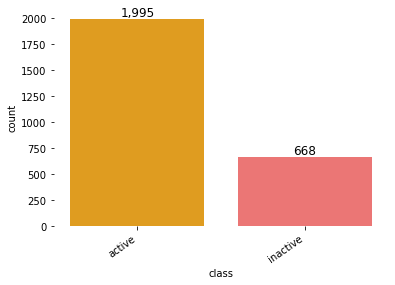

In [23]:
activity_th = []
for i in df_protein2.protein_plasma_binding:
    if float(i) <= 85:
        activity_th.append("inactive")
    elif float(i) > 85:
        activity_th.append("active")
    
activity_class = pd.Series(activity_th, name='class')
class_df = pd.concat([df_protein2, activity_class], axis=1)

a = sns.countplot(x='class', data=class_df, palette=colors_palette)

annotate(a)

a.set_xticklabels(a.get_xticklabels(), rotation=35, ha="right")
sns.despine(left=True, bottom=True);

Text(0, 0.5, 'Protein plasma binding value')

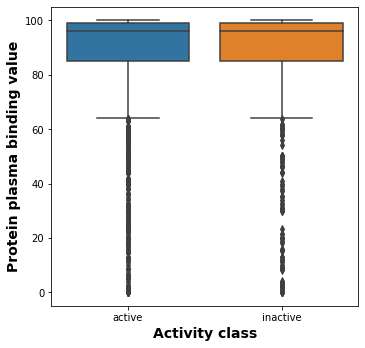

In [24]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'protein_plasma_binding', data = class_df)

plt.xlabel('Activity class', fontsize=14, fontweight='bold')
plt.ylabel('Protein plasma binding value', fontsize=14, fontweight='bold')

### 2.1.4 Prepare other fingerprints

In [156]:
to_drop_protein.sort(reverse=True)

In [141]:
df_protein_pubch.apply(pd.to_numeric, errors='coerce')
df_protein_pubch.drop(to_drop_protein, axis=0, inplace=True)
df_protein_pubch

protein_plasma_binding  PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  \
0                       99.0           1           1           1           1   
1                       89.9           1           1           1           0   
2                       97.0           1           1           1           0   
3                      100.0           1           1           1           1   
4                       82.0           1           1           1           1   
...                      ...         ...         ...         ...         ...   
2877                    98.3           1           1           1           0   
2878                    96.0           1           1           1           0   
2879                    99.9           1           1           0           0   
2880                    87.0           1           1           1           0   
2881                    75.0           1           1           1           0   

      PubchemFP4  PubchemFP5  PubchemFP6  PubchemFP7  PubchemFP8  PubchemFP9  \
0              0           0           0           0           0           1   
1              0           0           0           0           0           1   
2              0           0           0           0           0           1   
3              0           0           0           0           0           1   
4              0           0           0           0           0           1   
...          ...         ...         ...         ...         ...         ...   
2877           0           0           0           0           0           1   
2878           0           0           0           0           0           1   
2879           0           0           0           0           0           1   
2880           0           0           0           0           0           1   
2881           0           0           0           0           0           1   

      PubchemFP10  PubchemFP11  PubchemFP12  PubchemFP13  PubchemFP14  \
0               1            1            1            0            1   
1               1            1            0            0            1   
2               1            1            1            0            1   
3               1            1            1            1            1   
4               1            1            1            0            1   
...           ...          ...          ...          ...          ...   
2877            1            1            1            0            1   
2878            1            1            1            0            1   
2879            1            1            1            0            1   
2880            1            1            1            0            1   
2881            1            1            1            0            1   

      PubchemFP15  PubchemFP16  PubchemFP17  PubchemFP18  PubchemFP19  \
0               1            0            0            1            1   
1               1            0            0            1            0   
2               1            0            0            1            0   
3               0            0            0            1            1   
4               1            0            0            1            1   
...           ...          ...          ...          ...          ...   
2877            1            1            0            1            1   
2878            1            1            0            1            1   
2879            1            0            0            1            1   
2880            1            1            1            0            0   
2881            1            1            1            0            0   

      PubchemFP20  PubchemFP21  PubchemFP22  PubchemFP23  PubchemFP24  \
0               1            0            0            1            1   
1               0            0            0            1            0   
2               0            0            0            0            0   
3               0            0        

In [142]:
df_protein_klek.apply(pd.to_numeric, errors='coerce')
df_protein_klek.drop(to_drop_protein, axis=0, inplace=True)
df_protein_klek

protein_plasma_binding  KRFP1  KRFP2  KRFP3  KRFP4  KRFP5  KRFP6  KRFP7  \
0                       99.0      1      1      0      0      0      0      0   
1                       89.9      1      0      0      0      0      0      0   
2                       97.0      1      0      0      0      0      0      0   
3                      100.0      1      0      0      0      0      0      0   
4                       82.0      1      0      0      0      0      0      0   
...                      ...    ...    ...    ...    ...    ...    ...    ...   
2877                    98.3      1      0      0      0      0      0      0   
2878                    96.0      1      1      0      0      0      0      0   
2879                    99.9      0      0      0      0      0      0      0   
2880                    87.0      1      0      0      0      0      0      0   
2881                    75.0      1      0      0      0      0      0      0   

      KRFP8  KRFP9  KRFP10  KRFP11  KRFP12  KRFP13  KRFP14  KRFP15  KRFP16  \
0         0      0       0       0       0       0       0       0       0   
1         0      0       0       0       0       0       1       0       1   
2         0      0       0       0       0       0       1       0       0   
3         0      0       0       0       0       0       0       0       0   
4         0      0       0       0       0       0       0       0       0   
...     ...    ...     ...     ...     ...     ...     ...     ...     ...   
2877      0      0       0       0       0       0       1       0       0   
2878      0      0       0       0       0       0       1       0       0   
2879      0      0       0       0       0       0       0       0       0   
2880      0      0       0       0       0       0       0       0       0   
2881      0      0       0       0       0       0       0       0       0   

      KRFP17  KRFP18  KRFP19  KRFP20  KRFP21  KRFP22  KRFP23  KRFP24  KRFP25  \
0          0       0       0       1       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          0       0       0       0       0       0       0       0       0   
3          0       1       0       0       0       0       0       0       0   
4          0       0       0       1       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
2877       0       0       0       0       0       0       0       0       0   
2878       0       0       0       1       0       0       0       0       0   
2879       0       0       0       0       0       0       0       0       0   
2880       0       0       0       0       0       0       0       0       0   
2881       0       0       0       0       0       0       0       0       0   

      KRFP26  KRFP27  KRFP28  KRFP29  KRFP30  KRFP31  KRFP32  KRFP33  KRFP34  \
0          0       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          0       0       0       0       0       0       0       0       0   
3          0       0       0       0       0       0       0       1       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
2877       0       0       0       0       0       0       0       0       0   
2878       0       0       0       0       0       0       0       0       0   
2879       0       0       0       0       0       0       0       0       0   
2880       0       0       0       0       0       0       0       0       0   
2881       0       0       0       0       0       0       0       0       0   

      KRFP35  KRFP36  KRFP37  KRFP38  KRFP39  KRFP40  KRFP41  KRFP42  KRFP43  \
0          0       0       0       0       0       0       0       0       0   
1          0  

### 2.1.5 Save

In [143]:
df_protein2.to_csv('../data/processed/protein_maccs_all.csv', index=False)
df_protein_pubch.to_csv('../data/processed/protein_pubchem_all.csv', index=False)
df_protein_klek.to_csv('../data/processed/protein_klek_all.csv', index=False)

## 3. SDF file

Prepare SDF file with mols. 

### 3.1 Load data

In [157]:
suppl = Chem.SDMolSupplier('../data/raw/protein_plasma_binding_for_fingeprint_calculation.sdf')
ms = [x for x in suppl if x is not None]
len(ms)

2882

### 3.2 Preprocess

Convert mols to smiles.

In [159]:
protein_smiles = [MolToSmiles(x,isomericSmiles=False) for x in ms ]
df_protein_smiles = pd.DataFrame(protein_smiles, columns=['smiles'])
df_protein_smiles

smiles
0     Cc1ccc(CNC(=O)c2cc(C#CC(C)(C)O)cnc2NCc2ccc3c(c...
1                     Cc1cccc(NC(=O)c2cc(F)cc(C#N)c2)n1
2               CC1CCCN1CCc1cc2cc(-c3ccc(C#N)cc3)ccc2o1
3     COc1cc2ccc(Br)cc2cc1C(c1ccccc1)C(O)(CCN(C)C)c1...
4     CCC(C)(CCN1CCOCC1)N(Cc1cc2ccccc2n(C)c1=O)C(=O)...
...                                                 ...
2877  Cc1ccc(-c2cc(C(F)(F)F)ccc2C2CCOc3cc(S(=O)(=O)N...
2878     CC(C)c1c(-c2cnn(C3COC3)c2)[nH]c2c(C#N)cnn2c1=O
2879  O=C(O)c1cccc(-n2c(C=Cc3cc(Cl)cs3)nc3ccccc3c2=O)c1
2880    CN1CCN(c2ncc(-c3ccc4c(Nc5cnccn5)ccnc4c3)cn2)CC1
2881   CN1CCCN(c2ncc(-c3ccc4c(Nc5cnccn5)ccnc4c3)cn2)CC1

[2882 rows x 1 columns]

Drop.

In [160]:
len(to_drop_protein)

219

In [161]:
df_protein_smiles.drop(to_drop_protein, axis=0, inplace=True)
df_protein_smiles

smiles
0     Cc1ccc(CNC(=O)c2cc(C#CC(C)(C)O)cnc2NCc2ccc3c(c...
1                     Cc1cccc(NC(=O)c2cc(F)cc(C#N)c2)n1
2               CC1CCCN1CCc1cc2cc(-c3ccc(C#N)cc3)ccc2o1
3     COc1cc2ccc(Br)cc2cc1C(c1ccccc1)C(O)(CCN(C)C)c1...
4     CCC(C)(CCN1CCOCC1)N(Cc1cc2ccccc2n(C)c1=O)C(=O)...
...                                                 ...
2877  Cc1ccc(-c2cc(C(F)(F)F)ccc2C2CCOc3cc(S(=O)(=O)N...
2878     CC(C)c1c(-c2cnn(C3COC3)c2)[nH]c2c(C#N)cnn2c1=O
2879  O=C(O)c1cccc(-n2c(C=Cc3cc(Cl)cs3)nc3ccccc3c2=O)c1
2880    CN1CCN(c2ncc(-c3ccc4c(Nc5cnccn5)ccnc4c3)cn2)CC1
2881   CN1CCCN(c2ncc(-c3ccc4c(Nc5cnccn5)ccnc4c3)cn2)CC1

[2663 rows x 1 columns]

Join.

In [162]:
df_protein_smiles = df_protein_smiles.join(df_protein2['protein_plasma_binding'])
df_protein_smiles

smiles  \
0     Cc1ccc(CNC(=O)c2cc(C#CC(C)(C)O)cnc2NCc2ccc3c(c...   
1                     Cc1cccc(NC(=O)c2cc(F)cc(C#N)c2)n1   
2               CC1CCCN1CCc1cc2cc(-c3ccc(C#N)cc3)ccc2o1   
3     COc1cc2ccc(Br)cc2cc1C(c1ccccc1)C(O)(CCN(C)C)c1...   
4     CCC(C)(CCN1CCOCC1)N(Cc1cc2ccccc2n(C)c1=O)C(=O)...   
...                                                 ...   
2877  Cc1ccc(-c2cc(C(F)(F)F)ccc2C2CCOc3cc(S(=O)(=O)N...   
2878     CC(C)c1c(-c2cnn(C3COC3)c2)[nH]c2c(C#N)cnn2c1=O   
2879  O=C(O)c1cccc(-n2c(C=Cc3cc(Cl)cs3)nc3ccccc3c2=O)c1   
2880    CN1CCN(c2ncc(-c3ccc4c(Nc5cnccn5)ccnc4c3)cn2)CC1   
2881   CN1CCCN(c2ncc(-c3ccc4c(Nc5cnccn5)ccnc4c3)cn2)CC1   

      protein_plasma_binding  
0                       99.0  
1                       89.9  
2                       97.0  
3                      100.0  
4                       82.0  
...                      ...  
2877                    98.3  
2878                    96.0  
2879                    99.9  
2880                    87.0  
2881                    75.0  

[2663 rows x 2 columns]

In [163]:
df_protein_smiles['protein_plasma_binding'].isnull().values.any()

False

### 3.3 Save

In [164]:
df_protein_smiles.to_csv('../data/processed/protein_smiles_all.csv', index=False)